# Answering the Science Question

This notebook serves as a demo for answering the science question underlying the design of Sherine's Florida regional model.

For reference, the science question for Sherine's model is: **How does increased humidity in in Florida's coast affect the ocean temperature?**

First, import packages to re-create and visualize the model fields here:

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [10]:
# define the input directory
project_dir = '/Users/sherine_aldrin/Downloads/CS-185C/project'

Then, re-create the model grid

In [11]:
delX = 1/12
delY = 1/16
xgOrigin = -90
ygOrigin = 20
n_rows = 360
n_cols = 240

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## Plot a model field at one timestep
To assess the temperature differences spatially, I'll plot the differences between the model results with normal humidity and with increased humidity. I'll choose one field near the end of my simulation:

In [19]:
# read in the grid with the normal humidity
grid_normal = np.fromfile(os.path.join(project_dir,'run','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000001728.data'), '>f4')
grid_normal = grid_normal.reshape((2,n_rows,n_cols))

# read in the grid with increased humidity
grid_increase_humidity = np.fromfile(os.path.join(project_dir,'run','diagsModified',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000001728.data'), '>f4')
grid_increase_humidity = grid_increase_humidity.reshape((2,n_rows,n_cols))

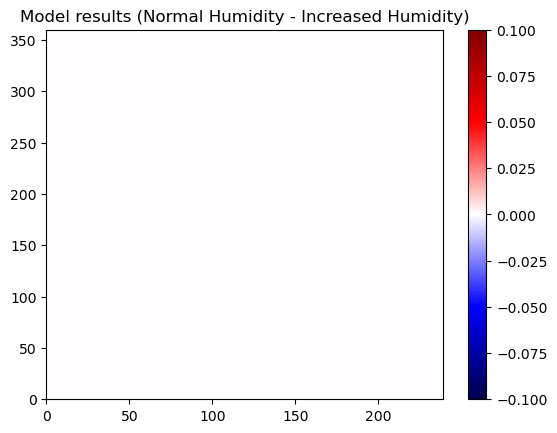

In [20]:
# plot the differences
C = plt.pcolormesh(grid_normal[0,:,:-1]-grid_increase_humidity[0,:,:-1],
                   cmap='seismic',vmin=-0.1, vmax=0.1)
plt.colorbar(C)
plt.title('Model results (Normal Humidity - Increased Humidity)')
plt.show()

There seems to be no difference. This is probably because the second time this ran, there was sadly no output data.

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [21]:
row = 100
col = 122

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [22]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(2004,1,15) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [27]:
timestep_dates = []
theta_normal = []
theta_increased_humidity = []
for file_name in sorted(os.listdir(os.path.join(project_dir,'run','diags','TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid with the norm
        grid_normal = np.fromfile(os.path.join(project_dir,'run','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_normal = grid_normal.reshape((2,n_rows,n_cols))
        
        # read in the grid without the wind
        grid_increase_humidity = np.fromfile(os.path.join(project_dir,'run','diagsModified',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_increase_humidity = grid_increase_humidity.reshape((2,n_rows,n_cols))

        theta_normal.append(grid_normal[0,row,col])
        theta_increased_humidity.append(grid_increase_humidity[0,row,col])

Finally, I'll plot the timeseries to see the comparison:

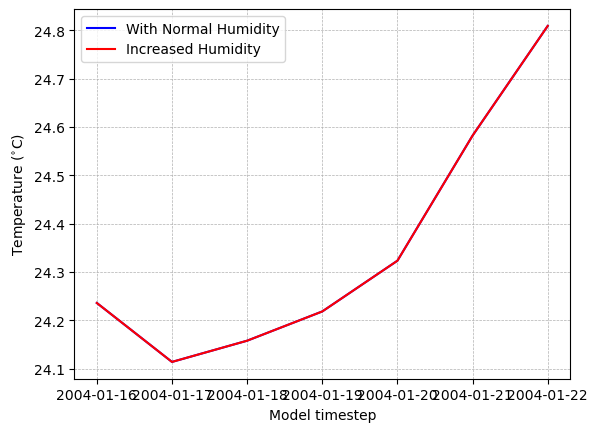

In [29]:
plt.plot(timestep_dates, theta_normal,'b-',label='With Normal Humidity')
plt.plot(timestep_dates, theta_increased_humidity,'r-',label='Increased Humidity')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Model timestep')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

As with my spatial plot, I can see the change in temperature. With the humidity the temperature seems to increase. Though without the model running and without real evidence for correlation as I can't see the difference, there's nothing to really conclude and my results remain inconclusive.